In [84]:
!pip install tensorflow 
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [85]:
import tensorflow as tf
import os
import cv2
import imghdr

In [86]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [87]:
data_dir = "/Users/owner/Downloads/1Folder"

In [88]:
# Remove .DS_Store file
ds_store_path = os.path.join(data_dir, ".DS_Store")
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)

img_exists = ["jpg", "jpeg", "png", "bmp"]

In [89]:
# Remove non-image files
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exists:
                print("Image not in ext list")
                os.remove(image_path)
        except Exception as e:
            print('issue with image{}'.format(image_path))
os.listdir(os.path.join(data_dir, "1Kitten"))

['petmd-kitten-facts.jpg',
 'cozykittens3.jpg',
 'kitten.jpg',
 'content_cute-kitten-from-marnie-russ-2.jpg',
 'keeping-newborn-kittens-warm_600x600.png',
 'images27.jpg',
 'images25.jpg',
 'news-kittens.jpg',
 'image15.jpeg',
 '91zKkmaQu9L.jpg',
 'kittens_in_a_basket_31119c11e9.jpg',
 'Blog_-_Newborn_Kitten_Care_Week_by_Week_1200x600_crop_center.jpg',
 'Dotties-kittens-Duff-Ave-4-scaled.jpg',
 'image-75486-800.jpg',
 'feral-kittens.jpg',
 'shutterstock_2063521145_header.jpg',
 'Choosing-a-kitten.png',
 'KittenCare.jpg',
 'Dont-Kitnap-Kittens.png',
 'JerryArlyneBenFrechette2915sak-hero.jpg',
 'images6.jpg',
 'maxresdefault.jpg',
 'image-80926-800.jpg',
 'Kittens202.jpeg',
 'kitten_5.jpg',
 'thumb_the-new-kitten-checklist-top-tips-for-bringing-a-new-kitten-home_1655281961571.jpeg',
 'DG8A6597.jpg',
 'cat-and-kitten-snuggling.jpg',
 'Do_kittens_shed_f9917858-b52f-4192-bf8e-4f46ed98e9aa.jpg',
 'web1_231221-vne-kittens-abandoned_2.jpg',
 'Helping-your-new-cat-or-kitten-settle-in-1.png',
 '

In [90]:
import numpy as np
import matplotlib.pyplot as plt

data = tf.keras.utils.image_dataset_from_directory("/Users/owner/Downloads/1Folder")

Found 173 files belonging to 2 classes.


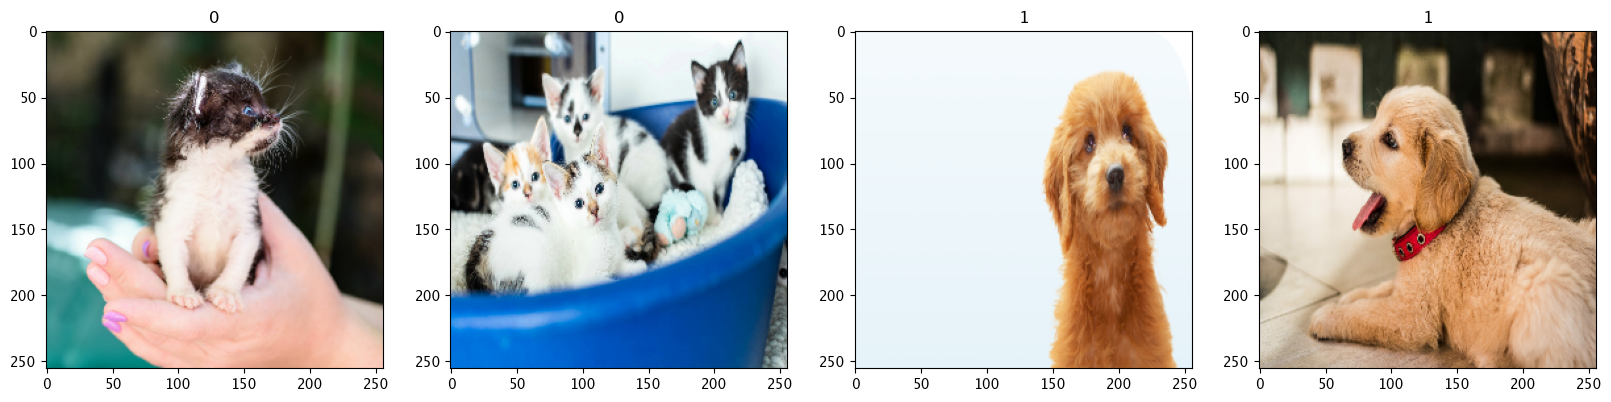

In [91]:
#looking at the data
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()

In [92]:
# Preprocess the data
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

data = data.map(lambda x, y: (x / 255, y))

In [93]:
# Scale the data
scaled_iterator = data.as_numpy_iterator()

In [94]:
# Split the data
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)+1
test_size = int(len(data) * 0.1)+1

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

#Training the model
model  = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [96]:
model.compile(optimizer="adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

Epoch 1/20
4/4 [==============================] - 10s 2s/step - loss: 0.8646 - accuracy: 0.5547 - val_loss: 0.6715 - val_accuracy: 0.5556
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.6816 - accuracy: 0.5469 - val_loss: 0.6305 - val_accuracy: 0.6889
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6499 - accuracy: 0.6094 - val_loss: 0.5858 - val_accuracy: 0.7778
Epoch 4/20
4/4 [==============================] - 10s 2s/step - loss: 0.6191 - accuracy: 0.6719 - val_loss: 0.6827 - val_accuracy: 0.4889
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.5469 - accuracy: 0.7188 - val_loss: 0.5411 - val_accuracy: 0.8222
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.5047 - accuracy: 0.8203 - val_loss: 0.4160 - val_accuracy: 0.8667
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.4583 - accuracy: 0.7656 - val_loss: 0.4068 - val_accuracy: 0.8444
Epoch 8/20
4/4 [=======================

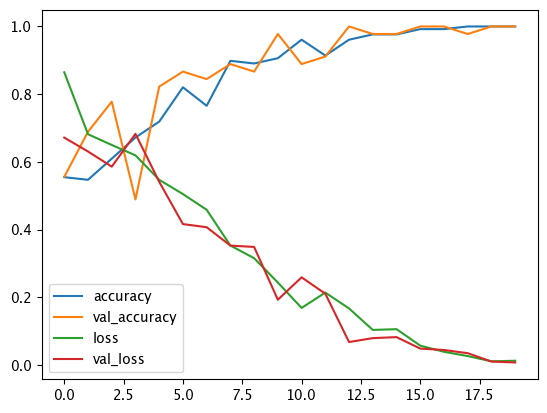

In [98]:
logdir  = "logs"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

hist = model.fit(train, validation_data=val, epochs=20, callbacks=[tensorboard_callback])


fig = plt.figure()
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["val_accuracy"], label="val_accuracy")
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [99]:
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

print("Precision: ", precision.result().numpy(), "Recall: ", recall.result().numpy(), "Accuracy: ", accuracy.result().numpy())

Precision:  0.0 Recall:  0.0 Accuracy:  0.0


In [100]:
#Test the model
img = cv2.imread("/Users/owner/Downloads/signs-your-dog-need-to-go-potty.jpg")
resize = tf.image.resize(img, (256, 256))

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 104ms/step


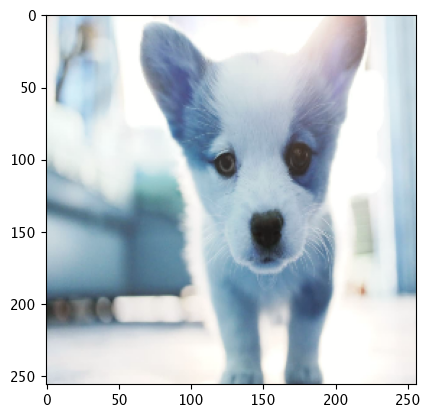

In [101]:

plt.imshow(resize.numpy().astype(int))
plt.show()

In [102]:
if yhat > 0.5:
    print("it is a Puppy")
else:
    print("it is a Kitten")

it is a Puppy


In [103]:
#Test the model
img = cv2.imread("/Users/owner/Downloads/images.jpeg")
resize = tf.image.resize(img, (256, 256))

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


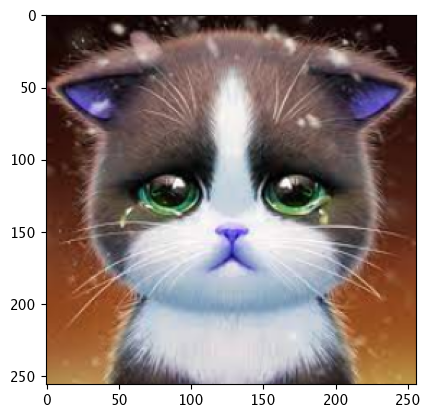

In [104]:
plt.imshow(resize.numpy().astype(int))
plt.show()

In [105]:
if yhat > 0.5:
    print("it is a Puppy")
else:
    print("it is a Kitten")

it is a Kitten
